#Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск.

__1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного спуска и стохастического градиентного спуска. Построить графики среднеквадратичной ошибки от числа итераций для обоих методов на одном рисунке, сделать выводы о разнице скорости сходимости каждого из методов.__

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

Отмасштабируем получившиеся признаки методом стандартизации.

In [3]:
# Получим средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
 
# Вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [4]:
# Реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

Подготовка данных и средств проверки закончена. Далее реализуем градиентный спуск и стохастический градиентный спуск.

In [5]:
# Определяем функцию для метода градиентного спуска
errors = []


def eval_GD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        y_pred = np.dot(X, w)
        err = calc_mse(y, y_pred)
        errors.append(err)
        w -= alpha * (1/n * 2 * np.dot((y_pred - y), X))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, err

In [6]:
# Определяем функцию для стохастического градиентного спуска
errors_2 = []


def eval_SGD(X, y, iterations, alpha=1e-4):
    np.random.seed(42)
    w = np.random.randn(X.shape[1]) # начальное приближение весов
    n = X.shape[0] # число наблюдений
    for i in range(1, iterations + 1):
        err = calc_mse(y, np.dot(X, w))
        errors_2.append(err)
        # генерируем случайный индекс объекта выборки
        ind = np.random.randint(n)
        y_pred = np.dot(X[ind], w)
        w -= alpha * (2 * np.dot((y_pred - y[ind]), X[ind]))
        if i % (iterations / 10) == 0:
            print(i, w, err)
    return w, err

In [7]:
# Метод градиентного спуска
%%time

eval_GD(data, target, iterations=10000, alpha=1e-3)

1000 [40.94191113  1.57797649] 65.18103200147722
2000 [46.40042625  1.66700766] 25.90416194656688
3000 [47.13761532  1.6597574 ] 25.188120730844517
4000 [47.23724302  1.65617408] 25.17503113977775
5000 [47.25071644  1.65533806] 25.174791203392896
6000 [47.25253979  1.65517751] 25.17478679341083
7000 [47.25278671  1.65514938] 25.174786712140733
8000 [47.25282018  1.65514471] 25.17478671063913
9000 [47.25282471  1.65514396] 25.17478671061131
10000 [47.25282533  1.65514384] 25.174786710610796
CPU times: user 1.08 s, sys: 734 ms, total: 1.81 s
Wall time: 980 ms


(array([47.25282533,  1.65514384]), 25.174786710610796)

In [8]:
# Cтохастический градиентный спуск
%%time

eval_SGD(data, target, iterations=10000, alpha=1e-3) 

1000 [40.97001033  1.55296709] 64.78811527876307
2000 [46.36425399  1.684618  ] 25.958864792596202
3000 [47.20644313  1.6710779 ] 25.17687473698663
4000 [47.39086778  1.42962262] 25.23847478056046
5000 [47.27691503  1.45044681] 25.21739151624164
6000 [47.36117783  1.27717602] 25.322957334256124
7000 [47.2557607   1.50792036] 25.199681969871396
8000 [47.1764214   1.50370203] 25.203741100975325
9000 [47.46062683  1.89631229] 25.277342597346493
10000 [47.23688979  1.7497035 ] 25.18542337236452
CPU times: user 1.07 s, sys: 803 ms, total: 1.87 s
Wall time: 994 ms


(array([47.23688979,  1.7497035 ]), 25.18542337236452)

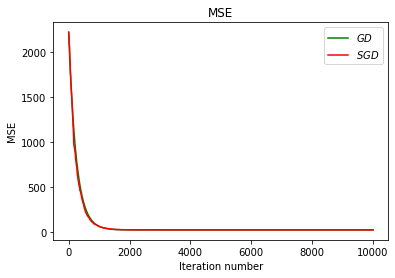

In [9]:
# Визуализируем изменение MSE
plt.plot(range(len(errors)), errors, color='g', label=r'$GD$')
plt.plot(range(len(errors_2)), errors_2, color='r', label=r'$SGD$')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend()

Графики сходимости обоих алгоритмов совпадают, соответственно скорость сходимости обоих методов одинакова.